# TOOLS for Hologram reconstruction

- author : Sylvie Dagoret-Campagne
- affiliation : IJCLab/IN2P3/CNES, DESC-LSST fullmember, behalf AuxTel Teal VERA C. Rubin observatory
- creation date : February 8th 2021

In [50]:
import ipywidgets as widgets
import sympy
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams["figure.figsize"] = (16,4)

# Constants

## Hologram recording 

In [51]:
Z=200 # mm, distance between hologram and source plane

In [52]:
x_A=0 # mm, position of the source A
y_A=0 # mm, 

In [53]:
x_B=20 ## mm, position of the source B that will become the first order
y_B=0 ## mm

In [54]:
wl0=0.639e-3 ## recording wavelength in mm

In [55]:
XMIN=-20
XMAX=20
YMIN=-20
YMAX=20
NPIX=50

## Function

In [56]:
def dd(x,y,x0,y0):
    """
    d_A(x,y,x0,y0) : distance between the point(x,y) on the hologram to the source of coordinate (x0,y0,Z)
    """
    
    dist = np.sqrt((x-x0)**2+(y-y0)**2+Z**2)
    
    return dist

In [57]:
def dd_diff(x,y):
    """
    d_ddiff(x,y) : distance difference between the two sources
    """
    dd_diff=dd(x,y,x_A,y_A)-dd(x,y,x_B,y_B)
    return dd_diff

In [58]:
def dd_phi(x,y):
    """
    dd_phase(x,y) : phase difference at point x,y on CCD
    """
    return 2*np.pi/wl0*dd_diff(x,y)

In [59]:
def interf_pattern(x,y):
    return 0.5*(np.cos(dd_phi(x,y))+1)

In [60]:
def dA(x,y):
    return dd(x,y,x_A,y_A)

In [61]:
def dB(x,y):
    return dd(x,y,x_B,y_B)

In [62]:
def dIdx(x,y):   
    dIdx=np.pi/wl0*( (x-x_A)/dA(x,y)- (x-x_B)/dB(x,y))*np.sin(2*np.pi*dd_diff(x,y)/wl0)  
    return dIdx

In [63]:
def dIdy(x,y):   
    dIdy=-np.pi/wl0*( (y-y_A)/dA(x,y)-(y-y_B)/dB(x,y))*np.sin(2*np.pi*dd_diff(x,y)/wl0)
    return dIdy

# Tables


In [64]:
X = np.linspace(XMIN, XMAX, NPIX)
Y = np.linspace(YMIN, YMAX, NPIX)
XX, YY = np.meshgrid(X, Y, sparse=True)
Z = interf_pattern(XX,YY)


# plot

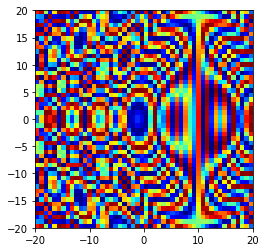

In [65]:
plt.imshow(Z,origin="lower",cmap="jet",extent=(XMIN,XMAX,YMIN,YMAX))

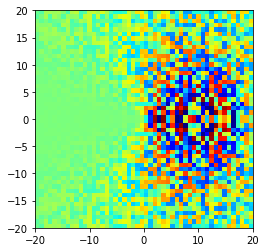

In [66]:
plt.imshow(dIdx(XX,YY),origin="lower",cmap="jet",extent=(XMIN,XMAX,YMIN,YMAX))

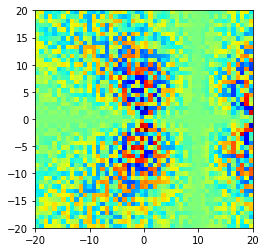

In [67]:
plt.imshow(dIdy(XX,YY),origin="lower",cmap="jet",extent=(XMIN,XMAX,YMIN,YMAX))

In [68]:
I=interf_pattern(XX,YY)
U=1./dIdx(XX,YY)
V=1./dIdy(XX,YY)
U=U/np.sqrt(U**2+V**2)
V=V/np.sqrt(U**2+V**2)

In [69]:
V0, U0 = np.gradient(I, .2, .2)

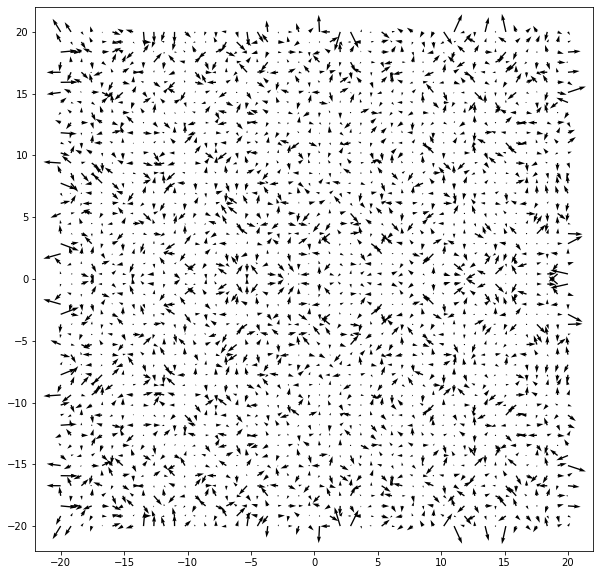

In [70]:
fig, ax = plt.subplots(figsize=(10,10))
q = ax.quiver(XX, YY, U0, V0)

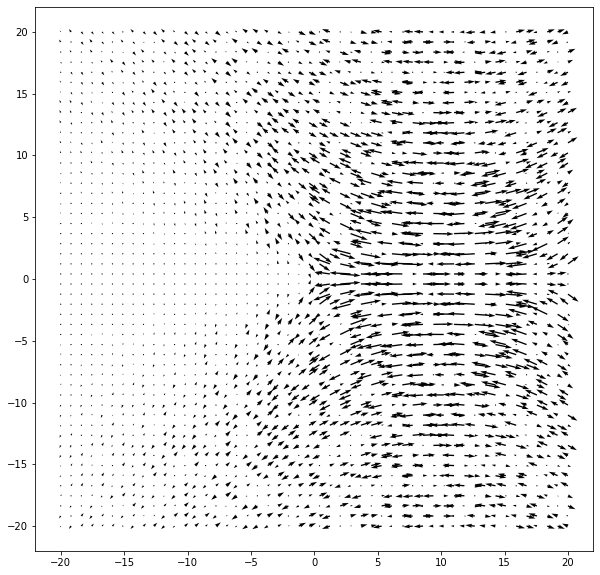

In [71]:
fig, ax = plt.subplots(figsize=(10,10))
q = ax.quiver(XX, YY, dIdx(XX,YY), dIdy(XX,YY))

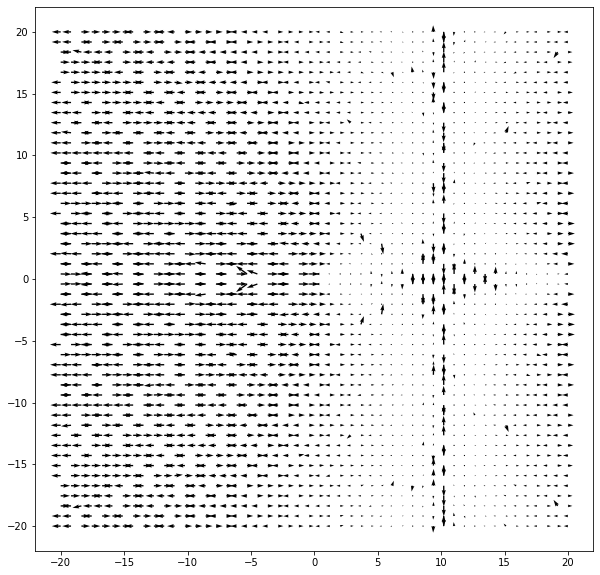

In [72]:

fig, ax = plt.subplots(figsize=(10,10))
q = ax.quiver(XX, YY, U, V)

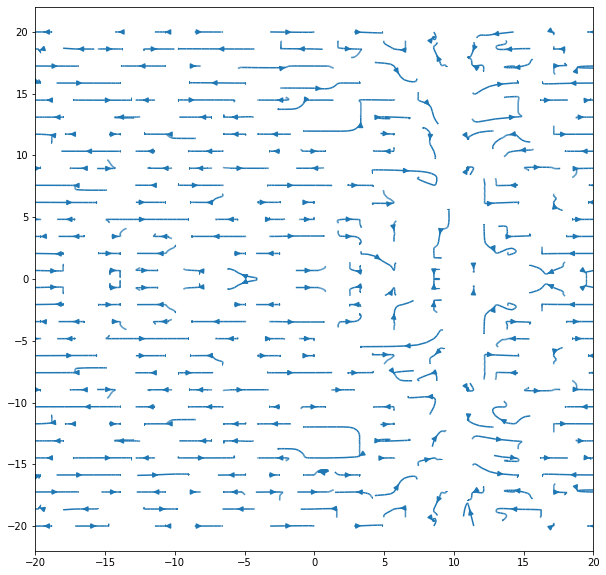

In [73]:
fig, ax = plt.subplots(figsize=(10,10))
ax.streamplot(X, Y, U, V, density=[0.5, 1])